<a href="https://colab.research.google.com/github/anjelammcgraw/Evaluation-of-RAG-using-RAGAS/blob/main/11_Evaluation_of_RAG_using_Ragas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation of RAG Using Ragas


## Installing Required Libraries

In [ ]:
!pip install -U -q langchain langchain-openai langchain_core langchain-community langchainhub openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install -qU ragas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
!pip install -qU faiss_cpu pymupdf pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 18.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


## Set Environment Variables


In [ ]:
import os
import openai
from getpass import getpass

openai.api_key = getpass("Please provide your OpenAI Key: ")
os.environ["OPENAI_API_KEY"] = openai.api_key

Please provide your OpenAI Key: ··········


## Creating a Simple RAG Pipeline with LangChain v0.1.0


## Building our RAG pipeline

- Create an Index
- Use retrieval to obtain pieces of context from our Index that are similar to our query
- Use a LLM to generate responses based on the retrieved context


### Creating an Index



#### Loading Data


In [ ]:
!git clone https://github.com/AI-Maker-Space/DataRepository

Cloning into 'DataRepository'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 54 (delta 15), reused 20 (delta 7), pack-reused 8
Receiving objects: 100% (54/54), 51.28 MiB | 35.22 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(
    "DataRepository/MuskComplaint.pdf",
)

documents = loader.load()

In [ ]:
documents[0].metadata

{'source': 'DataRepository/MuskComplaint.pdf',
 'file_path': 'DataRepository/MuskComplaint.pdf',
 'page': 0,
 'total_pages': 46,
 'format': 'PDF 1.7',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': '',
 'producer': '',
 'creationDate': '',
 'modDate': '',
 'trapped': ''}

#### Transforming Data


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 700,
    chunk_overlap = 50
)

documents = text_splitter.split_documents(documents)

In [ ]:
len(documents)

159

#### Loading OpenAI Embeddings Model


In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)

#### Creating a FAISS VectorStore


In [ ]:
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(documents, embeddings)

####❓ Question #1:

List out a few of the techniques that FAISS uses that make it performant.

#### ✅ Answer:
Some of the techniques that FAISS uses to make it performant:
1. vector quantization - to compress vectors and reduce memory footprint (speeds up search)
2. batch processing - for adding vectors to index and for searching (takes advantage of parallel processing instead of one vector at a time)
3. multi-level indexes - for large datasets, partitions data into subsets for finer-grained indexing and searching


#### Creating a Retriever


In [ ]:
retriever = vector_store.as_retriever()

#### Testing our Retriever



In [ ]:
retrieved_documents = retriever.invoke("Who is the plantiff?")

In [ ]:
for doc in retrieved_documents:
  print(doc)

page_content='would be owned by the foundation and used ‘for the good of the world’[.]” Plaintiff \nreplied: “Agree on all.” Ex. 2 at 1.' metadata={'source': 'DataRepository/MuskComplaint.pdf', 'file_path': 'DataRepository/MuskComplaint.pdf', 'page': 27, 'total_pages': 46, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': '', 'creationDate': '', 'modDate': '', 'trapped': ''}
page_content='property and derivative works funded by those monies, Plaintiff is presently unable to ascertain his \ninterest in or the use, allocation, or distribution of assets without an accounting. Plaintiff is therefore \nentitled to an accounting.' metadata={'source': 'DataRepository/MuskComplaint.pdf', 'file_path': 'DataRepository/MuskComplaint.pdf', 'page': 32, 'total_pages': 46, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': '', 'creationDate': '', 'modDate': '', 'trapped': ''}
page_content='1

### Creating a RAG Chain


#### Creating a Prompt Template


In [ ]:
from langchain import hub

retrieval_qa_prompt = hub.pull("langchain-ai/retrieval-qa-chat")

In [ ]:
print(retrieval_qa_prompt.messages[0].prompt.template)

Answer any use questions based solely on the context below:

<context>
{context}
</context>


In [ ]:
from langchain.prompts import ChatPromptTemplate

template = """Answer the question based only on the following context. If you cannot answer the question with the context, please respond with 'I don't know':

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

#### Setting Up our Basic QA Chain


In [ ]:
from operator import itemgetter

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

primary_qa_llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | primary_qa_llm, "context": itemgetter("context")}
)

####🏗️ Activity #1:

Describe the pipeline shown above in simple terms. You can include a diagram if desired.

#### ✅ Acitvity 1:

The pipeline described is a sequence of steps designed to perform retrieval-augmented question answering.
1. Starts with user question
2. Retrieve contextual information
3. Pass through the context
4. Generate Response
5. Output


In [ ]:
question = "Who is the plantiff?"

result = retrieval_augmented_qa_chain.invoke({"question" : question})

print(result["response"].content)

Elon Musk


In [ ]:
question = "What does this complaint pertain to?"

result = retrieval_augmented_qa_chain.invoke({"question" : question})

print(result["response"].content)
print(result["context"])

The complaint pertains to breach of fiduciary duty, unfair business practices, and accounting.
[Document(page_content='1 \n2 \n3 \n4 \n5 \n6 \n7 \n8 \n9 \n10 \n11 \n12 \n13 \n14 \n15 \n16 \n17 \n18 \n19 \n20 \n21 \n22 \n23 \n24 \n25 \n26 \n27 \n28 \n \n \n– 31 – \nCOMPLAINT \n \nTHIRD CAUSE OF ACTION \nBreach of Fiduciary Duty  \nAgainst All Defendants \n133. \nPlaintiff realleges and incorporates by reference only paragraphs of this Complaint \nnecessary for his claim of Breach of Fiduciary Duty. \n134. \nUnder California law, Defendants owe fiduciary duties to Plaintiff, including a duty \nto use Plaintiff’s contributions for the purposes for which they were made. E.g., Cal. Bus. & Prof. \nCode § 17510.8. Defendants have repeatedly breached their fiduciary duties to Plaintiff, including \nby:', metadata={'source': 'DataRepository/MuskComplaint.pdf', 'file_path': 'DataRepository/MuskComplaint.pdf', 'page': 30, 'total_pages': 46, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject

## Synthetic Dataset Generation for Evaluation using Ragas


### Synthetic Test Set Generation



In [ ]:
eval_documents = documents

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 400
)

eval_documents = text_splitter.split_documents(eval_documents)

####❓ Question #2:

Why is it important to split our documents using different parameters when creating our synthetic data?

#### ✅ Answer:
Splitting documents using different parameters when creating our synthetic data is important because it's great at improving quality, and usefulness of the dataset. Different parameters can prevent modelse from being biased towards the most frequent classes. Having different parameters also can reduce overfitting and splitting can lead to datasets that highlight different features/aspects of the data point.

In [ ]:
len(documents)

159

In [ ]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context

generator = TestsetGenerator.with_openai()

testset = generator.generate_with_langchain_docs(documents, test_size=10, distributions={simple: 0.25, reasoning: 0.25, multi_context: 0.5})

embedding nodes:   0%|          | 0/318 [00:00<?, ?it/s]

Generating:   0%|          | 0/10 [00:00<?, ?it/s]

####❓ Question #3:

`{simple: 0.5, reasoning: 0.25, multi_context: 0.25}`

What exactly does this mapping refer to?

#### ✅ Answer:

This mapping is referring to data that consists of different questioning types in the created dataset.


In [ ]:
testset.test_data[0]

DataRow(question="Who was the CEO of Google's parent company Alphabet, Inc.?", contexts=['Page, then-CEO of Google’s parent company Alphabet, Inc. Mr. Musk would frequently raise the \ndangers of AI in his conversations with Mr. Page, but to Mr. Musk’s shock, Mr. Page was \nunconcerned. For example, in 2013, Mr. Musk had a passionate exchange with Mr. Page about the \ndangers of AI. He warned that unless safeguards were put in place, “artificial intelligence-systems \nmight replace humans, making our species irrelevant or even extinct.” Mr. Page responded that \nwould merely “be the next stage of evolution,” and claimed Mr. Musk was being a “specist”—that'], ground_truth='Page', evolution_type='simple')

### Generating Responses with RAG Pipeline



In [ ]:
test_df = testset.to_pandas()

In [ ]:
test_df

,question,contexts,ground_truth,evolution_type,episode_done
0,Who was the CEO of Google's parent company Alp...,"[Page, then-CEO of Google’s parent company Alp...",Page,simple,True
1,What game did OpenAI compete in using reinforc...,[77. \nInitial work at OpenAI followed much in...,OpenAI competed in Dota 2 using reinforcement ...,simple,True
2,How did researchers demonstrate GPT-3's comple...,[implementation for others to build on. \n84. ...,Researchers demonstrated GPT-3's complex reaso...,reasoning,True
3,What strategy video game did OpenAI's team com...,[77. \nInitial work at OpenAI followed much in...,OpenAI's team competed in Dota 2 instead of ch...,reasoning,True
4,What were the benefits discussed in the paper ...,"[challenging.” At the time, OpenAI stated that...",The paper co-authored by OpenAI scientists and...,multi_context,True
5,"""What game did OpenAI use reinforcement learni...",[77. \nInitial work at OpenAI followed much in...,OpenAI used reinforcement learning in the game...,multi_context,True
6,What was OpenAI's original intention in the AG...,[profit developing AGI for the benefit of huma...,"OpenAI's original intention in the AGI race, a...",multi_context,True
7,What concerns do US officials have about OpenA...,[chip fabrication plants. If $10 billion from ...,US officials have concerns about OpenAI's inve...,multi_context,True
8,What were Stephen Hawking's concerns about AGI...,[18. \nMr. Musk has long recognized that AGI p...,nan,multi_context,True
9,What is the significance of the Transformer ar...,[those connections to the target language. \n7...,The Transformer architecture is significant in...,simple,True


In [ ]:
 test_questions = test_df["question"].values.tolist()
 test_groundtruths = test_df["ground_truth"].values.tolist()

In [ ]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

In [ ]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [ ]:
response_dataset[0]

{'question': "Who was the CEO of Google's parent company Alphabet, Inc.?",
 'answer': 'Larry Page',
 'contexts': ['2015, it appeared that Mr. Musk may have found someone who understood his concerns about AI \nand his desire to keep the first AGI out of the hands of a private company like Google: Defendant \nSam Altman.   \n42. \nAt this time, Mr. Altman was the president of Y Combinator, a start-up accelerator \nin Silicon Valley. Before that, Mr. Altman had been involved in various startup ventures.',
  'Page, then-CEO of Google’s parent company Alphabet, Inc. Mr. Musk would frequently raise the \ndangers of AI in his conversations with Mr. Page, but to Mr. Musk’s shock, Mr. Page was \nunconcerned. For example, in 2013, Mr. Musk had a passionate exchange with Mr. Page about the \ndangers of AI. He warned that unless safeguards were put in place, “artificial intelligence-systems \nmight replace humans, making our species irrelevant or even extinct.” Mr. Page responded that \nwould mere

##Evaluating our Pipeline with Ragas

Specific metrics:

- [Faithfulness](https://docs.ragas.io/en/stable/concepts/metrics/faithfulness.html)
- [Answer Relevancy](https://docs.ragas.io/en/stable/concepts/metrics/answer_relevance.html)
- [Context Precision](https://docs.ragas.io/en/stable/concepts/metrics/context_precision.html)
- [Context Recall](https://docs.ragas.io/en/stable/concepts/metrics/context_recall.html)
- [Answer Correctness](https://docs.ragas.io/en/stable/concepts/metrics/answer_correctness.html)



In [ ]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_precision,
)

metrics = [
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
    answer_correctness,
]

In [ ]:
results = evaluate(response_dataset, metrics)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
results

{'faithfulness': 0.8056, 'answer_relevancy': 0.9479, 'context_recall': 0.8500, 'context_precision': 0.8500, 'answer_correctness': 0.7317}

In [ ]:
results_df = results.to_pandas()
results_df

,question,answer,contexts,ground_truth,faithfulness,answer_relevancy,context_recall,context_precision,answer_correctness
0,Who was the CEO of Google's parent company Alp...,Larry Page,"[2015, it appeared that Mr. Musk may have foun...",Page,1.00,0.995868,1.0,0.5,0.710805
1,What game did OpenAI compete in using reinforc...,Dota 2,[77. \nInitial work at OpenAI followed much in...,OpenAI competed in Dota 2 using reinforcement ...,1.00,0.988038,1.0,1.0,0.962706
2,How did researchers demonstrate GPT-3's comple...,Researchers demonstrated GPT-3's complex reaso...,[implementation for others to build on. \n84. ...,Researchers demonstrated GPT-3's complex reaso...,1.00,0.958730,1.0,1.0,0.738175
3,What strategy video game did OpenAI's team com...,Dota 2,[77. \nInitial work at OpenAI followed much in...,OpenAI's team competed in Dota 2 instead of ch...,1.00,0.928077,1.0,1.0,0.956120
4,What were the benefits discussed in the paper ...,The benefits discussed in the paper were relat...,"[challenging.” At the time, OpenAI stated that...",The paper co-authored by OpenAI scientists and...,1.00,0.878892,1.0,1.0,0.982723
5,"""What game did OpenAI use reinforcement learni...",OpenAI used reinforcement learning to compete ...,[77. \nInitial work at OpenAI followed much in...,OpenAI used reinforcement learning in the game...,1.00,0.922178,0.5,1.0,0.539319
6,What was OpenAI's original intention in the AG...,OpenAI's original intention in the AGI race as...,[profit developing AGI for the benefit of huma...,"OpenAI's original intention in the AGI race, a...",NaN,0.955943,1.0,1.0,0.748239
7,What concerns do US officials have about OpenA...,US officials are concerned about OpenAI's ties...,[chip fabrication plants. If $10 billion from ...,US officials have concerns about OpenAI's inve...,0.00,0.951477,1.0,1.0,0.745618
8,What were Stephen Hawking's concerns about AGI...,Stephen Hawking's concerns about AGI in the wr...,[to its mission to develop AGI for the benefit...,nan,0.50,0.928273,0.0,0.0,0.186764
9,What is the significance of the Transformer ar...,The Transformer architecture played a signific...,[those connections to the target language. \n7...,The Transformer architecture is significant in...,0.75,0.971165,1.0,1.0,0.746246


## Making Adjustments to our RAG Pipeline


In [ ]:
from langchain.retrievers import MultiQueryRetriever

advanced_retriever = MultiQueryRetriever.from_llm(retriever=retriever, llm=primary_qa_llm)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain = create_stuff_documents_chain(primary_qa_llm, retrieval_qa_prompt)

In [ ]:
from langchain.chains import create_retrieval_chain

retrieval_chain = create_retrieval_chain(advanced_retriever, document_chain)

In [ ]:
response = retrieval_chain.invoke({"input": "Who is the plantiff?"})

In [ ]:
print(response["answer"])

The plaintiff is Elon Musk.


In [ ]:
response = retrieval_chain.invoke({"input": "What does this complaint pertain to?"})

In [ ]:
print(response["answer"])

The complaint pertains to a legal case involving Plaintiff Elon Musk alleging breach of fiduciary duty, unfair business practices, and seeking an accounting, restitution, disgorgement of funds, and injunctive relief against all Defendants. The complaint also includes a demand for a jury trial.


In [ ]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_chain.invoke({"input" : question})
  answers.append(response["answer"])
  contexts.append([context.page_content for context in response["context"]])

In [ ]:
response_dataset_advanced_retrieval = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [ ]:
advanced_retrieval_results = evaluate(response_dataset_advanced_retrieval, metrics)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
advanced_retrieval_results_df = advanced_retrieval_results.to_pandas()
advanced_retrieval_results_df

,question,answer,contexts,ground_truth,faithfulness,answer_relevancy,context_recall,context_precision,answer_correctness
0,Who was the CEO of Google's parent company Alp...,"The CEO of Google's parent company Alphabet, I...","[2015, it appeared that Mr. Musk may have foun...",Page,1.000000,0.984068,1.0,0.5,0.703475
1,What game did OpenAI compete in using reinforc...,"OpenAI competed in Dota 2, a strategy video ga...",[77. \nInitial work at OpenAI followed much in...,OpenAI competed in Dota 2 using reinforcement ...,1.000000,1.000000,1.0,1.0,0.746921
2,How did researchers demonstrate GPT-3's comple...,Researchers at the University of Tokyo and Goo...,[implementation for others to build on. \n84. ...,Researchers demonstrated GPT-3's complex reaso...,1.000000,0.944104,1.0,1.0,0.734162
3,What strategy video game did OpenAI's team com...,"OpenAI's team competed in Dota 2, a strategy v...",[77. \nInitial work at OpenAI followed much in...,OpenAI's team competed in Dota 2 instead of ch...,1.000000,0.953292,1.0,1.0,0.996399
4,What were the benefits discussed in the paper ...,The benefits discussed in the paper included t...,"[challenging.” At the time, OpenAI stated that...",The paper co-authored by OpenAI scientists and...,1.000000,0.949827,1.0,1.0,0.975658
5,"""What game did OpenAI use reinforcement learni...",OpenAI used reinforcement learning in the stra...,[77. \nInitial work at OpenAI followed much in...,OpenAI used reinforcement learning in the game...,1.000000,0.937840,0.5,1.0,0.535380
6,What was OpenAI's original intention in the AG...,"OpenAI's original intention in the AGI race, a...",[profit developing AGI for the benefit of huma...,"OpenAI's original intention in the AGI race, a...",1.000000,0.928489,1.0,1.0,0.492869
7,What concerns do US officials have about OpenA...,US officials are concerned about OpenAI's pote...,[chip fabrication plants. If $10 billion from ...,US officials have concerns about OpenAI's inve...,0.857143,0.974220,1.0,1.0,0.540247
8,What were Stephen Hawking's concerns about AGI...,Stephen Hawking's concerns about AGI in the wr...,[to its mission to develop AGI for the benefit...,nan,1.000000,0.922451,0.0,0.0,0.825861
9,What is the significance of the Transformer ar...,The Transformer architecture played a crucial ...,[those connections to the target language. \n7...,The Transformer architecture is significant in...,0.857143,0.971165,1.0,1.0,0.841797


## Evaluating our Adjusted Pipeline Against Our Baseline



In [ ]:
results

{'faithfulness': 0.8056, 'answer_relevancy': 0.9479, 'context_recall': 0.8500, 'context_precision': 0.8500, 'answer_correctness': 0.7317}

And see how our advanced retrieval modified our chain!

In [ ]:
advanced_retrieval_results

{'faithfulness': 0.9714, 'answer_relevancy': 0.9565, 'context_recall': 0.8500, 'context_precision': 0.8500, 'answer_correctness': 0.7393}

In [ ]:
import pandas as pd

df_original = pd.DataFrame(list(results.items()), columns=['Metric', 'Baseline'])
df_comparison = pd.DataFrame(list(advanced_retrieval_results.items()), columns=['Metric', 'MultiQueryRetriever with Document Stuffing'])

df_merged = pd.merge(df_original, df_comparison, on='Metric')

df_merged['Delta'] = df_merged['MultiQueryRetriever with Document Stuffing'] - df_merged['Baseline']

df_merged

,Metric,Baseline,MultiQueryRetriever with Document Stuffing,Delta
0,faithfulness,0.805556,0.971429,1.658730e-01
1,answer_relevancy,0.947864,0.956545,8.681360e-03
2,context_recall,0.850000,0.850000,0.000000e+00
3,context_precision,0.850000,0.850000,5.000445e-13
4,answer_correctness,0.731671,0.739277,7.605576e-03


## Testing OpenAI's Claim


####🏗️ Activity #2:

Please provide markdown, or code comments, to explain which each of the following steps are doing!

In [ ]:
 #imports the necessary class for embedding document
new_embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

In [ ]:
#creates a vector store from docs using the embeddings
vector_store = FAISS.from_documents(documents, new_embeddings)
#embeds docs and then indexing w/ FAISS for efficiency w/ similarity search

In [ ]:
#converts vector store into a retriever that can be used to fecth docs based on a query
new_retriever = vector_store.as_retriever()

In [ ]:
#enhance retriever with capability to use a LLM for generating responses/combines document retrieval w/ LLM-based processsing
new_advanced_retriever = MultiQueryRetriever.from_llm(retriever=new_retriever, llm=primary_qa_llm)

In [ ]:
#integrates advanced retriever w/ a doc processing chain to create a comprehensive retrieval pipeline
new_retrieval_chain = create_retrieval_chain(new_advanced_retriever, document_chain)

In [ ]:
#processes a list of test question through retrieval chain, collects answers/contexts
#invokes retrieval chain for each questions
answers = []
contexts = []

for question in test_questions:
  response = new_retrieval_chain.invoke({"input" : question})
  answers.append(response["answer"])
  contexts.append([context.page_content for context in response["context"]])

In [ ]:
#create structured dataset from questions/answers/contexts/ground truth answers for eval
new_response_dataset_advanced_retrieval = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [ ]:
#evaliuates the performanec of the retrieval chain using the dataset we created (metrics like faithfulness/relevancy/recall/precision/correctedness are calculated)
new_advanced_retrieval_results = evaluate(new_response_dataset_advanced_retrieval, metrics)

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
#displays eval results/how system performed across different metrics
new_advanced_retrieval_results

{'faithfulness': 0.9267, 'answer_relevancy': 0.9419, 'context_recall': 0.7917, 'context_precision': 0.8143, 'answer_correctness': 0.6560}

In [ ]:
#prepares comparison of eval metrics across different retrieveal methods or configs (includes creating data frames for baseline/ADA/Text Embedding 3 then merging and comparing them)
df_baseline = pd.DataFrame(list(results.items()), columns=['Metric', 'Baseline'])
df_original = pd.DataFrame(list(advanced_retrieval_results.items()), columns=['Metric', 'ADA'])
df_comparison = pd.DataFrame(list(new_advanced_retrieval_results.items()), columns=['Metric', 'Text Embedding 3'])

df_merged = pd.merge(df_original, df_comparison, on='Metric')
df_merged = pd.merge(df_baseline, df_merged, on="Metric")

df_merged['Delta - TE3 -> ADA'] = df_merged['Text Embedding 3'] - df_merged['ADA']
df_merged['Delta - TE3 -> Baseline'] = df_merged['Text Embedding 3'] - df_merged['Baseline']

df_merged

,Metric,Baseline,ADA,Text Embedding 3,Delta - TE3 -> ADA,Delta - TE3 -> Baseline
0,faithfulness,0.805556,0.971429,0.926667,-0.044762,0.121111
1,answer_relevancy,0.947864,0.956545,0.941943,-0.014602,-0.005921
2,context_recall,0.850000,0.850000,0.791667,-0.058333,-0.058333
3,context_precision,0.850000,0.850000,0.814333,-0.035667,-0.035667
4,answer_correctness,0.731671,0.739277,0.655958,-0.083319,-0.075714


####❓ Question #4:

Do you think, in your opinion, `text-embedding-3-small` is significantly better than `ada`?

#### ✅ Answer:
In my opinion, the 'text-embedding-3-small' model is better than 'ada' because the text-embedding-3-small model is a significant upgrade over the text-embedding-ada-002 model, offering better performance on benchmarks and a lower price per token.

## BONUS ACTIVITY: Showcase Multi-Context Performance Changes

In [ ]:
evolution_types = test_df["evolution_type"].values.tolist()

response_dataset = Dataset.from_dict({
    "question": test_questions,
    "answer": answers,
    "contexts": contexts,
    "ground_truth": test_groundtruths,
    "evolution_type": evolution_types  # Include evolution types to distinguish question types
})

In [ ]:
def calculate_accuracy(ground_truths, predictions):
    correct = sum(1 for true, pred in zip(ground_truths, predictions) if true.strip().lower() == pred.strip().lower())
    return correct / len(ground_truths) if ground_truths else 0

In [ ]:
# Split the dataset by evolution type
simple_questions = response_dataset.filter(lambda example: example['evolution_type'] == 'simple')
reasoning_questions = response_dataset.filter(lambda example: example['evolution_type'] == 'reasoning')
multi_context_questions = response_dataset.filter(lambda example: example['evolution_type'] == 'multi_context')

# Calculate accuracy for each type
simple_accuracy = calculate_accuracy(simple_questions['ground_truth'], simple_questions['answer'])
reasoning_accuracy = calculate_accuracy(reasoning_questions['ground_truth'], reasoning_questions['answer'])
multi_context_accuracy = calculate_accuracy(multi_context_questions['ground_truth'], multi_context_questions['answer'])

print(f"Accuracy for Simple Questions: {simple_accuracy}")
print(f"Accuracy for Reasoning Questions: {reasoning_accuracy}")
print(f"Accuracy for Multi-Context Questions: {multi_context_accuracy}")

Filter:   0%|          | 0/10 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10 [00:00<?, ? examples/s]

Accuracy for Simple Questions: 0.0
Accuracy for Reasoning Questions: 0.0
Accuracy for Multi-Context Questions: 0.0


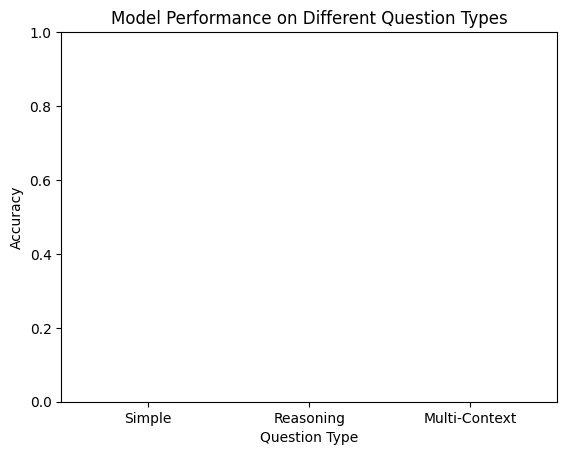

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Simple', 'Reasoning', 'Multi-Context']
accuracies = [simple_accuracy, reasoning_accuracy, multi_context_accuracy]

plt.bar(categories, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Question Type')
plt.ylabel('Accuracy')
plt.title('Model Performance on Different Question Types')
plt.ylim(0, 1)  # Assuming accuracy is a percentage
plt.show()